In [1]:
import spacy
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nlp = spacy.load('en_core_web_sm')
df = pd.read_json('../Dataset_Clean.json')

In [5]:
all_entities = []
for doc in nlp.pipe(df['text']):
    all_entities.extend([(ent.text.lower(), ent.label_) for ent in doc.ents])

In [6]:
# Filter out less interesting entities if needed, e.g., single numbers or letters
filtered_entities = [ent for ent in all_entities if len(ent[0]) > 2]

In [7]:
# Count and get the top 25
entity_counts = Counter(filtered_entities)
top_entities_df = pd.DataFrame(entity_counts.most_common(25), columns=['Entity', 'Frequency'])
top_entities_df[['Entity Text', 'Entity Type']] = pd.DataFrame(top_entities_df['Entity'].tolist(), index=top_entities_df.index)

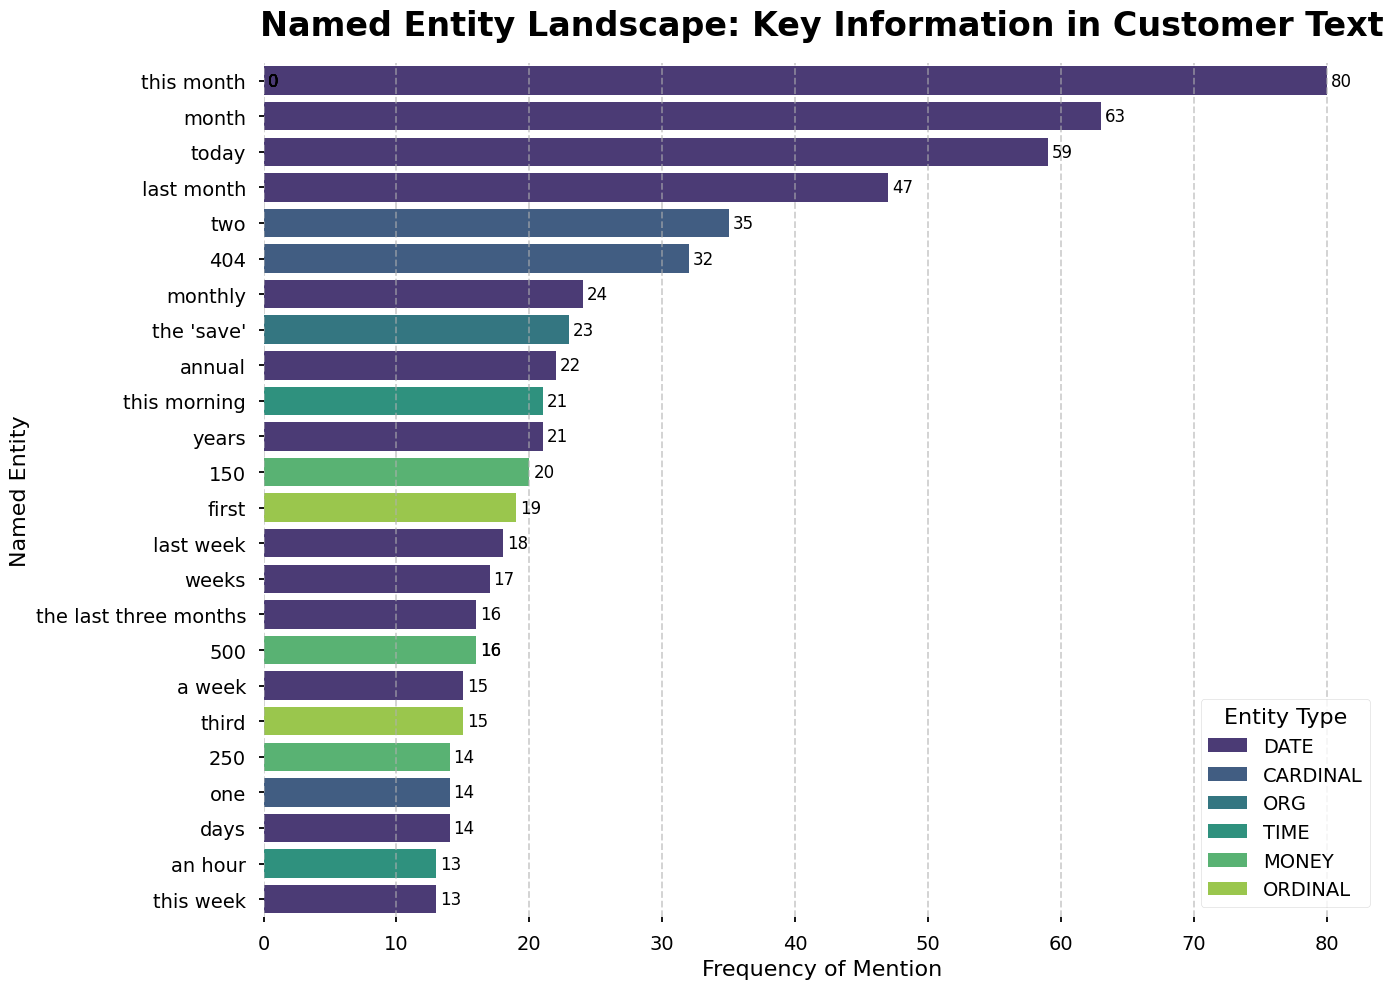

In [8]:
# --- The Professional Visualization ---
plt.style.use('seaborn-v0_8-talk')
fig, ax = plt.subplots(figsize=(14, 10))

# Create the plot with entity types as colors
sns.barplot(x='Frequency', y='Entity Text', hue='Entity Type', data=top_entities_df,
            dodge=False, palette='viridis', ax=ax)

# --- Title and Labels ---
ax.set_title('Named Entity Landscape: Key Information in Customer Text', fontsize=24, pad=20, weight='bold')
ax.set_xlabel('Frequency of Mention', fontsize=16)
ax.set_ylabel('Named Entity', fontsize=16)

# --- Annotations and Styling ---
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(title='Entity Type', fontsize=14, title_fontsize=16)
ax.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)

# Add data labels for clarity
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.3, p.get_y() + p.get_height() / 2.,
            f'{int(width)}',
            ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()